# Questão 4 - Equação calor bidimensional

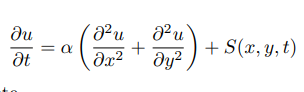

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

## Parâmetros

In [2]:
# Condições Iniciais/Contornos
# Parâmetros físicos
Lx = 10.0  # comprimento da placa em x
Ly = 10.0  # comprimento da placa em y
T = 2.0  # tempo total
k = 0.01  # difusividade térmica
nx = 100  # número de pontos de grade em x
ny = 100  # número de pontos de grade em y
nt = 400  # número de passos de tempo
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
dt = T / nt

#fonte interna
u = np.ones((nx, ny)) * 25.0
S = np.zeros((nx, ny))
S[int(nx/4), int(ny/4)] = 100.0  # Fonte interna de calor

# Condições de contorno
u[:, 0] = 0.0  # Condições de Contorno na base
u[:, -1] = 0.0  # Condições de Contorno no topo
u[-1, :] = 0.0  # Condições de Contorno nas laterais
u[:, int(0.5*ny)] = 1.0  # Fonte no centro da base

In [3]:
for _ in range(int(T / dt)):
    u_new = u.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = u[i, j] + k * dt / (dx**2) * (u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] - 4 * u[i, j]) + dt * S[i, j]
    u = np.copy(u_new)

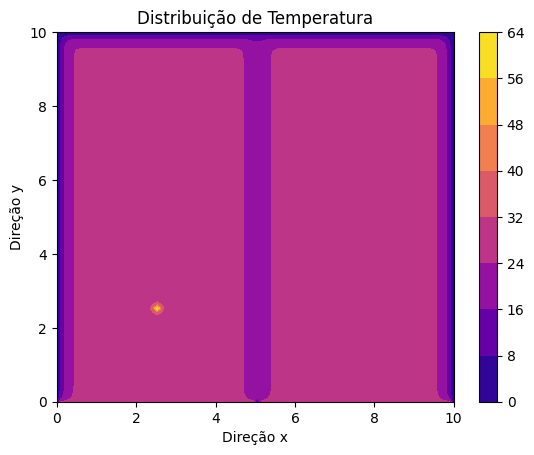

In [4]:
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
Z, P = np.meshgrid(x, y)
plt.contourf(Z, P, u, cmap='plasma')
plt.colorbar()
plt.title('Distribuição de Temperatura')
plt.xlabel('Direção x')
plt.ylabel('Direção y')
plt.show()

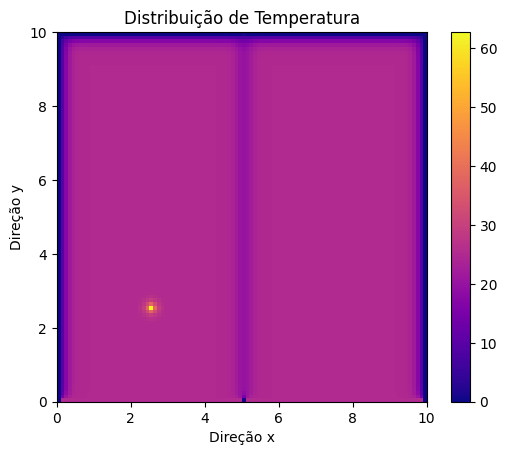

In [5]:
# Plotar usando imshow
plt.imshow(u, extent=[0, Lx, 0, Ly], cmap='plasma', origin='lower')
plt.colorbar()
plt.title('Distribuição de Temperatura')
plt.xlabel('Direção x')
plt.ylabel('Direção y')
plt.show()